In [5]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile

In [6]:
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
my_w = tk.Tk()
my_w.geometry("400x300")  # Size of the window 
my_w.title('License plate detection')
my_font1=('times', 18, 'bold')
l1 = tk.Label(my_w,text='Add vechine image containing license plate',width=40,font=my_font1)  
l1.grid(row=1,column=1)
b1 = tk.Button(my_w, text='Upload File', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1) 

def upload_file():
    global img
    f_types = [('Jpg Files', '*.jpg'),('Jpeg Files', '*.jpeg'),('png Files', '*.png')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    img = ImageTk.PhotoImage(file=filename)
    b2 =tk.Button(my_w,image=img) # using Button 
    b2.grid(row=3,column=1)

my_w.mainloop()  # Keep the window open

In [7]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract'

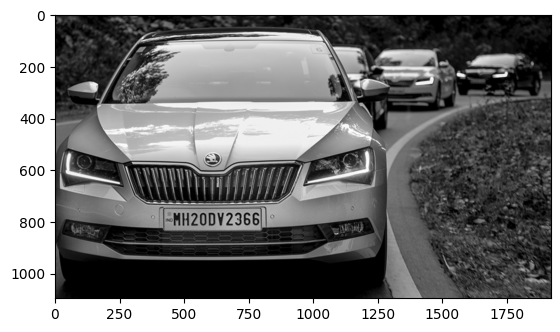

In [8]:

img = cv2.imread('4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

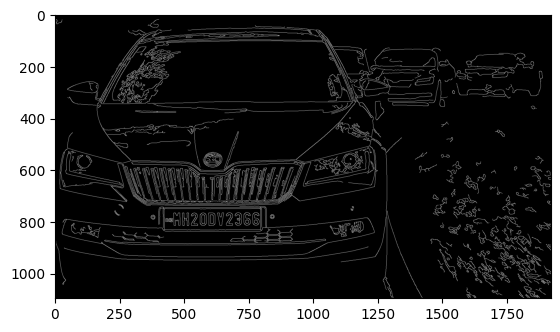

In [9]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
import imutils

In [11]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [19]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [13]:
location

array([[[421, 753]],

       [[421, 832]],

       [[794, 831]],

       [[791, 750]]], dtype=int32)

In [14]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, 2)
new_image = cv2.bitwise_and(img, img, mask=mask)

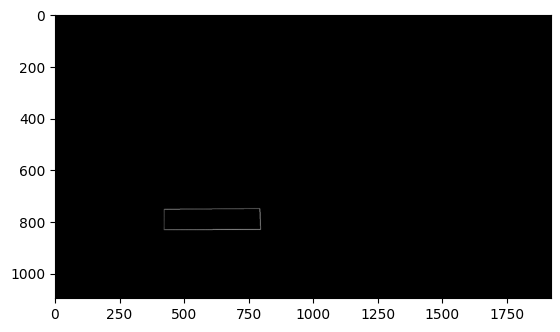

In [15]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [16]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

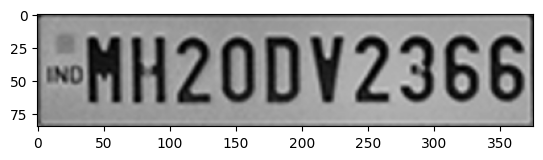

In [17]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

NameError: name 'result' is not defined

In [ ]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result
print(result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 4], [376, 4], [376, 78], [0, 78]], '"HHZODV2366', 0.33162919239452926)]


In [ ]:
plate=pytesseract.image_to_string(cropped_image,lang='eng')
print("vechile plate number = ",plate)
from tkinter import *
root=Tk()
root.geometry("750x250")
root.title("GUI - output")
label=Label(root,text="LICENSE PLATE NO : ")
label.pack()
our_msg=plate
messageVar=Message(root,text=our_msg,width="400")
messageVar.config(bg='white')
messageVar.pack()
root.mainloop()

vechile plate number =  ~MH20DV2366

